# Data Loader

In [3]:
import numpy as np
from moabb.datasets import BNCI2014002
import pandas as pd
import mne
from moabb.paradigms import  MotorImagery

%matplotlib inline

In [4]:
paradigm = MotorImagery(n_classes=2)
dataset = BNCI2014002()
subjects = [1]

X, y, metadata = paradigm.get_data(dataset=dataset, subjects=subjects)

Choosing from all possible events


In [5]:
dataset.subject_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [6]:
Y = y.tolist()
print('Feet: ', Y.count('feet'))
print('Right-hand: ', Y.count('right_hand'))

Feet:  80
Right-hand:  80


In [7]:
metadata

,subject,session,run
0,1,session_0,run_0
1,1,session_0,run_0
2,1,session_0,run_0
3,1,session_0,run_0
4,1,session_0,run_0
...,...,...,...
155,1,session_0,run_7
156,1,session_0,run_7
157,1,session_0,run_7
158,1,session_0,run_7


In [8]:
X.shape

(160, 15, 2561)

In [14]:
dataset = BNCI2014002()
paradigm = MotorImagery(n_classes=2)

def get_raw(dataset, paradigm, n_channels, sfreq):
    '''
    Takes a dataset from moabb datasets and creates 3 dictionaries with subject number as keys and X matrix, y labels and metadata
    as dictionary values respectively.
    X: Original 3D data matrix (num_cases, n_channels, lectures) is reshaped to 2D matrix ((num_cases*lectures),n_channels)
    y: This array corresponds with the class for each case. It has num_cases length.
    metadata: Describes each subject
    '''
    
    subjects_all = dataset.subject_list
    channels = [str(a+1) for a in range(n_channels)]
    

    X_all_subjects = {}
    y_all_subjects = {}
    metadata_all_subjects = {}
    
    for subject in subjects_all:
        
        X, y, metadata = paradigm.get_data(dataset=dataset, subjects=[subject])
        X_2d = X.reshape((X.shape[0]*X.shape[2]),n_channels)
        data_mne = X_2d.transpose()
        data_mne = data_mne / 1000000      
                        
        info_mne = mne.create_info(
            ch_names=channels,
            ch_types='eeg',
            sfreq=sfreq)
        
        raw = mne.io.RawArray(data_mne, info_mne)
        #ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
        #raw_1020 = raw.copy().set_montage(ten_twenty_montage)

        X_all_subjects.update({str(subject):raw})
        y_all_subjects.update({str(subject):y})
        metadata_all_subjects.update({str(subject):metadata})
        
    return X_all_subjects, y_all_subjects, metadata_all_subjects
        
        
X_all_subjects, y_all_subjects, metadata_all_subjects = get_raw(dataset, paradigm, 15, 512)

print(X_all_subjects)
    
    

Choosing from all possible events


Creating RawArray with float64 data, n_channels=15, n_times=409760
    Range : 0 ... 409759 =      0.000 ...   800.311 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=409760
    Range : 0 ... 409759 =      0.000 ...   800.311 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=409760
    Range : 0 ... 409759 =      0.000 ...   800.311 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=409760
    Range : 0 ... 409759 =      0.000 ...   800.311 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=409760
    Range : 0 ... 409759 =      0.000 ...   800.311 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=409760
    Range : 0 ... 409759 =      0.000 ...   800.311 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=409760
    Range : 0 ... 409759 =      0.000 ...   800.311 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=409760
    Range : 0 ..

In [15]:
X_all_subjects

{'1': <RawArray  |  None, n_channels x n_times : 15 x 409760 (800.3 sec), ~46.9 MB, data loaded>,
 '2': <RawArray  |  None, n_channels x n_times : 15 x 409760 (800.3 sec), ~46.9 MB, data loaded>,
 '3': <RawArray  |  None, n_channels x n_times : 15 x 409760 (800.3 sec), ~46.9 MB, data loaded>,
 '4': <RawArray  |  None, n_channels x n_times : 15 x 409760 (800.3 sec), ~46.9 MB, data loaded>,
 '5': <RawArray  |  None, n_channels x n_times : 15 x 409760 (800.3 sec), ~46.9 MB, data loaded>,
 '6': <RawArray  |  None, n_channels x n_times : 15 x 409760 (800.3 sec), ~46.9 MB, data loaded>,
 '7': <RawArray  |  None, n_channels x n_times : 15 x 409760 (800.3 sec), ~46.9 MB, data loaded>,
 '8': <RawArray  |  None, n_channels x n_times : 15 x 409760 (800.3 sec), ~46.9 MB, data loaded>,
 '9': <RawArray  |  None, n_channels x n_times : 15 x 409760 (800.3 sec), ~46.9 MB, data loaded>,
 '10': <RawArray  |  None, n_channels x n_times : 15 x 409760 (800.3 sec), ~46.9 MB, data loaded>,
 '11': <RawArray  |

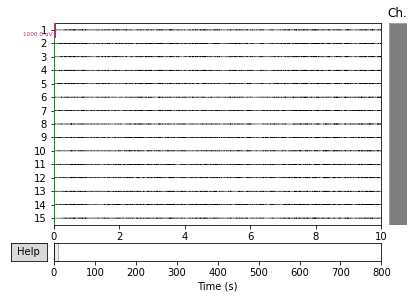

In [21]:
# Way to acces an specific subject
subject_i = X_all_subjects['3']
plot_fig = subject_i.plot(scalings = 0.5e-3)

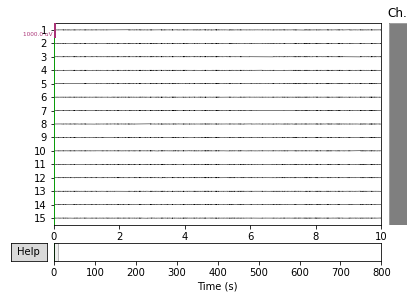

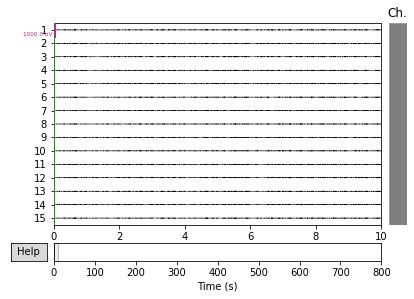

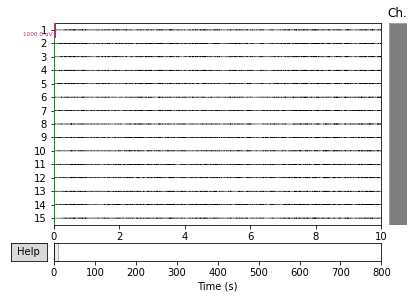

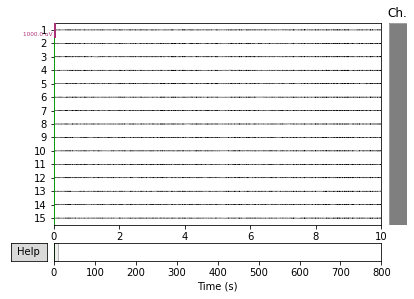

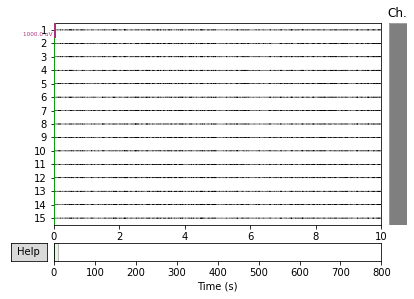

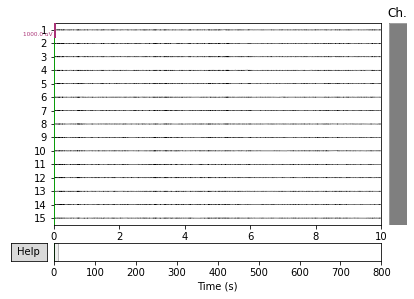

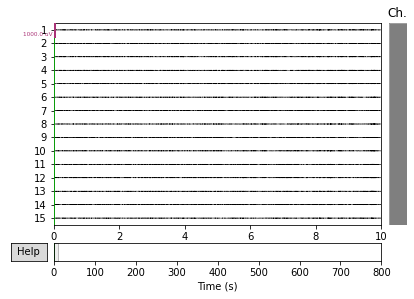

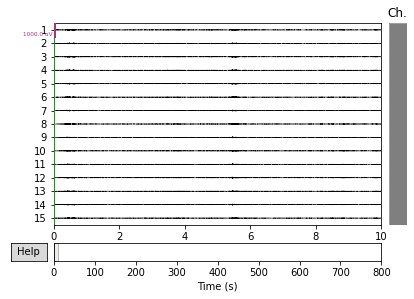

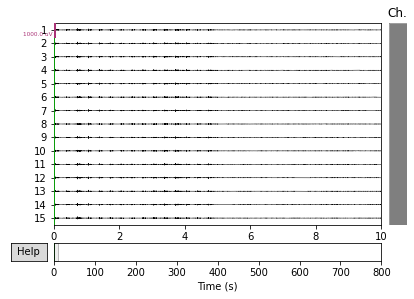

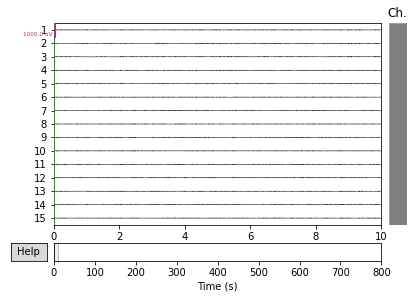

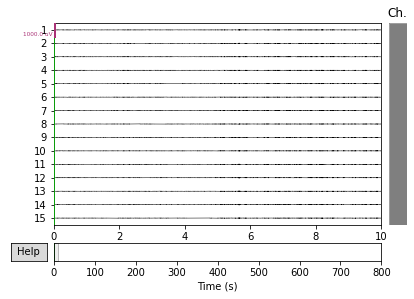

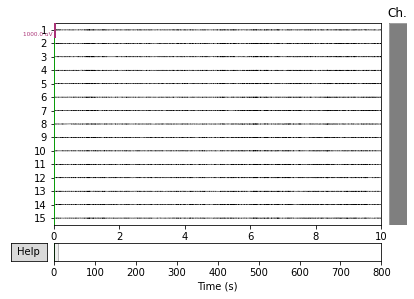

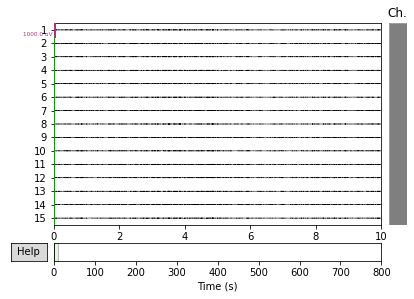

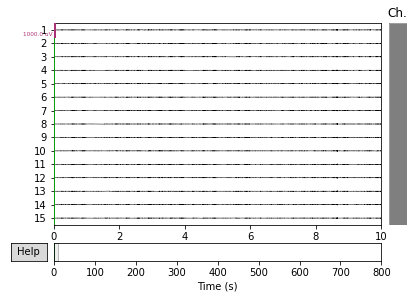

In [16]:
# Way to iterate among the dictionary with all subjects

for k,v  in X_all_subjects.items():
    plot_fig = v.plot(scalings = 0.5e-3)

Effective window size : 4.000 (s)


<ipython-input-17-f33281a45d69>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 30, average=False, tmin = 0, tmax = 250)


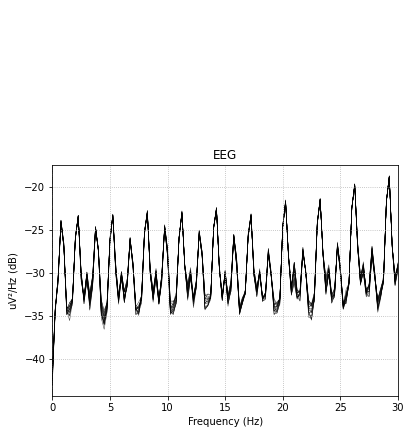

Effective window size : 4.000 (s)


<ipython-input-17-f33281a45d69>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 30, average=False, tmin = 0, tmax = 250)


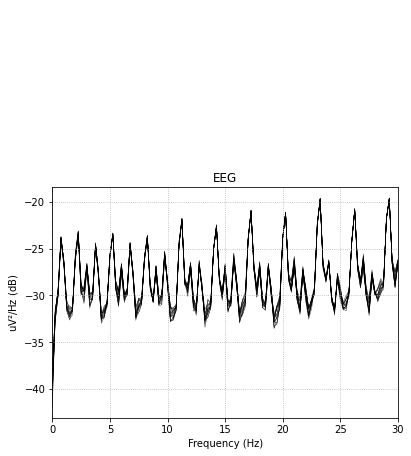

Effective window size : 4.000 (s)


<ipython-input-17-f33281a45d69>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 30, average=False, tmin = 0, tmax = 250)


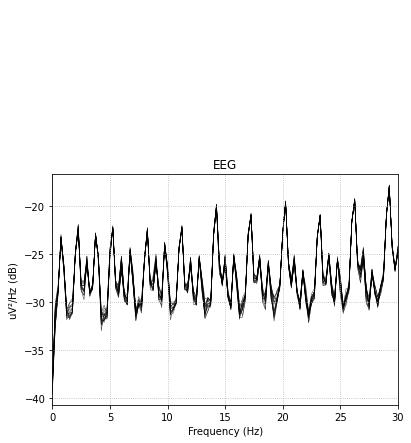

Effective window size : 4.000 (s)


<ipython-input-17-f33281a45d69>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 30, average=False, tmin = 0, tmax = 250)


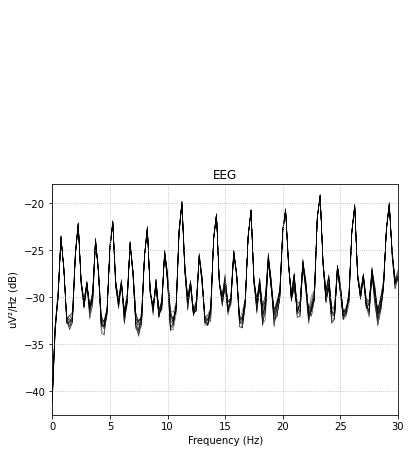

Effective window size : 4.000 (s)


<ipython-input-17-f33281a45d69>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 30, average=False, tmin = 0, tmax = 250)


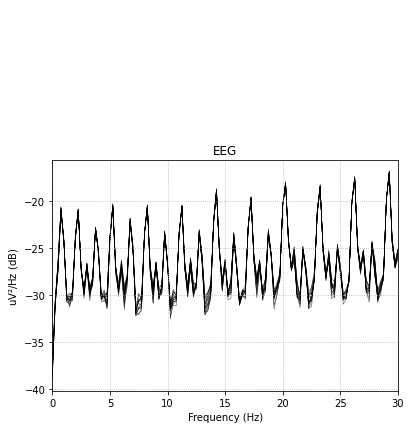

Effective window size : 4.000 (s)


<ipython-input-17-f33281a45d69>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 30, average=False, tmin = 0, tmax = 250)


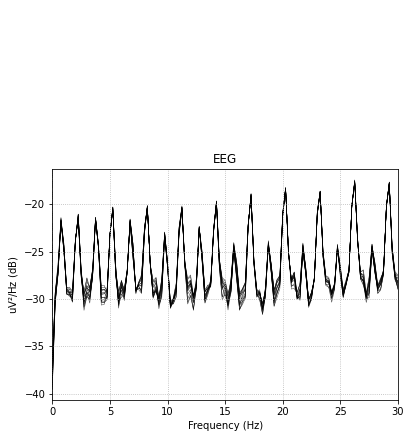

Effective window size : 4.000 (s)


<ipython-input-17-f33281a45d69>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 30, average=False, tmin = 0, tmax = 250)


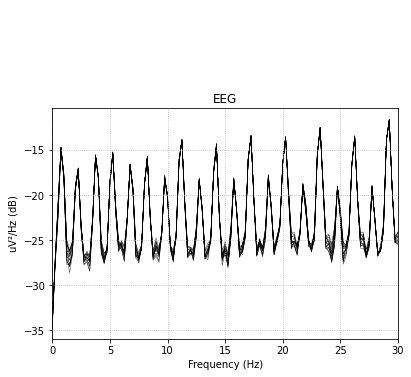

Effective window size : 4.000 (s)


<ipython-input-17-f33281a45d69>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 30, average=False, tmin = 0, tmax = 250)


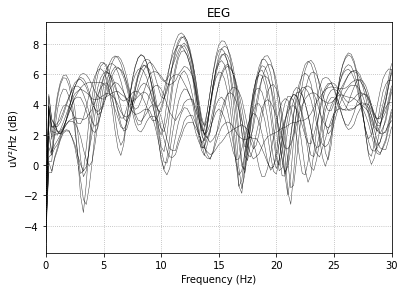

Effective window size : 4.000 (s)


<ipython-input-17-f33281a45d69>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 30, average=False, tmin = 0, tmax = 250)


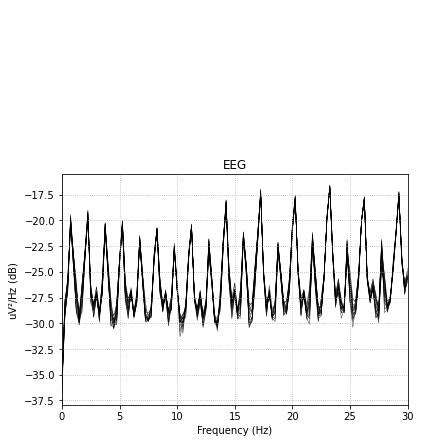

Effective window size : 4.000 (s)


<ipython-input-17-f33281a45d69>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 30, average=False, tmin = 0, tmax = 250)


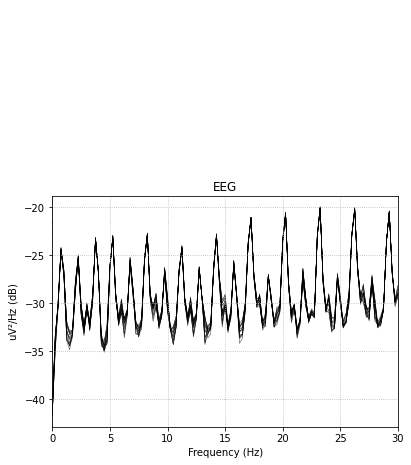

Effective window size : 4.000 (s)


<ipython-input-17-f33281a45d69>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 30, average=False, tmin = 0, tmax = 250)


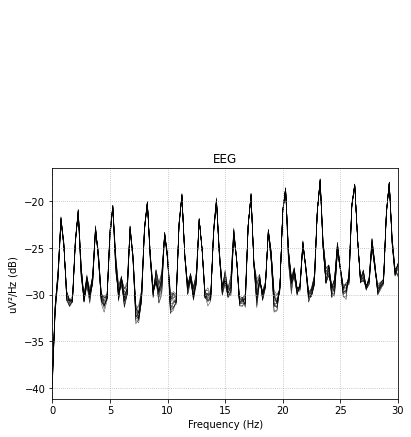

Effective window size : 4.000 (s)


<ipython-input-17-f33281a45d69>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 30, average=False, tmin = 0, tmax = 250)


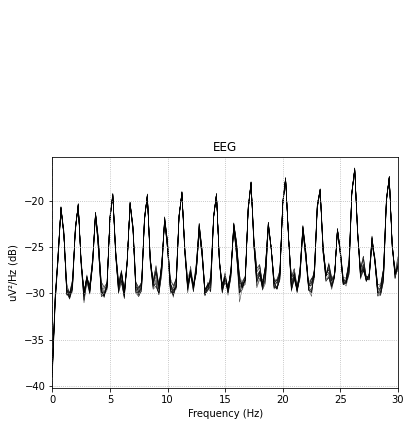

Effective window size : 4.000 (s)


<ipython-input-17-f33281a45d69>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 30, average=False, tmin = 0, tmax = 250)


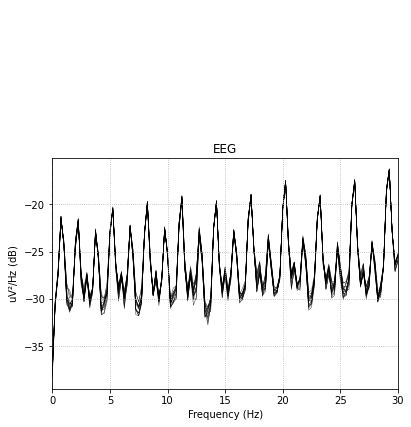

Effective window size : 4.000 (s)


<ipython-input-17-f33281a45d69>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 30, average=False, tmin = 0, tmax = 250)


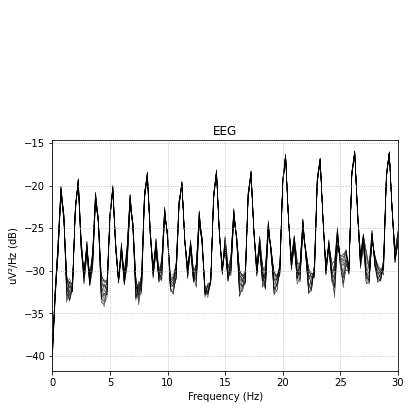

In [17]:
for number,subject in X_all_subjects.items():
    fig = subject.plot_psd(fmin = 0, fmax = 30, average=False, tmin = 0, tmax = 250)